In [161]:
%load_ext autoreload
%autoreload 2

import model

import numpy as np, pandas as pd

import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
world = model.World(randomize=True)

populations = {}
for i in range(100):
    world.evolve()
    
    s = world.census()
    populations[i] = s

populations = pd.concat(populations)

df = populations.copy()
df= df.stack().unstack(1).unstack(1)

agg = df.stack(0).sum(axis=1).unstack()

display(df.head())
display(agg.head())

population                                   ... cured                       \
          P0  P1 P2  P3 P4 P5  P6  P7  P8  P9  ...    P0 P1 P2 P3 P4 P5 P6 P7   
0         14  18  1  10  3  3  16  10  15  10  ...     0  0  0  0  0  0  0  0   
1         15  17  1  12  5  2  16   6  15  11  ...     0  0  0  0  0  0  0  0   
2         17  15  1  11  1  1  14   5  18  17  ...     0  0  0  0  0  0  0  0   
3         15  15  1  10  0  1  13   4  20  20  ...     0  0  0  0  0  0  0  0   
4         16  11  1  14  2  1  12   4  18  19  ...     0  0  0  0  0  0  0  0   

         
  P8 P9  
0  0  0  
1  0  0  
2  0  0  
3  0  0  
4  0  0  

[5 rows x 50 columns]

,cured,immune,infected,population,susceptible
0,0,1,1,100,99
1,0,17,17,100,83
2,0,31,31,100,69
3,0,44,44,99,55
4,0,76,76,98,22


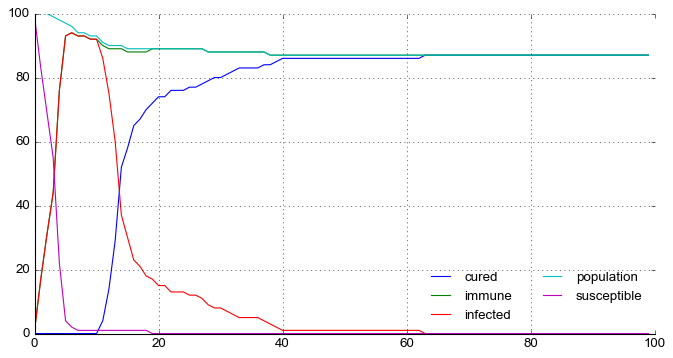

In [168]:
plt.style.use('classic')
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 12})

fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')

ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.grid(True,axis='both',linestyle=':')

for c in agg.columns:
    ax.plot(agg[c])

ax.legend(loc='best', fontsize=12, frameon=False, ncol=2)
plt.show()